# Part II - Possible impact of sociodemographic characteristics on performance of students
## by Mbang Ernest Ngong


## Investigation Overview


Here we are particularly interested in undertsanding the countries that had the most participation in the PISA 2012 survey, furthermore, we are intersted in the effort that students put in in studying mathematics across sexes( male and female) and we are finally interested in undertanding the effect of class repetition on the reading strength of students. On our last interest, we are also interested in having this undertsanding among sexes(males and females). 


## Dataset Overview

This analyis comprises drawing insight from the PISA dataset. The PISA dataset is part of the OECD's Programme for International Student Assessment .The PISA survey is a survey of students' skills and knowledge as they approach the end of compulsory education. Its main aim is to examine how well students have learned the school curriculum and how well they are prepared for life beyond school. It is made up of more than 600 variables that access these objectives. For this presentation we used just a part of the dataset.

In [1]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppressing warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading data to dataframe
df=pd.read_csv('pisa_interest.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485479 entries, 0 to 485478
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        485479 non-null  int64  
 1   Country                           485479 non-null  object 
 2   OECD Country status               485479 non-null  object 
 3   International grade               485479 non-null  int64  
 4   Birth year                        485427 non-null  float64
 5   Gender                            485479 non-null  object 
 6   Primary education start age       457991 non-null  float64
 7   Truancy of skiping school         479128 non-null  object 
 8   Repeat class                      436687 non-null  object 
 9   Mother education                  457976 non-null  object 
 10  Living with father                441033 non-null  object 
 11  Father education                  443258 non-null  o

## Top 5 countries with most participation in the 2012 PISA survey

The PISA 2012 survey saw a participation from over 65 countries, the Top 5 countries that recorded most participation were Mexico, Italy, Spain, Canada and Brasil in decreasing magnitude. several factors could be responsible for the reason why top participation was from these countries perhaps accessibility is a factor.

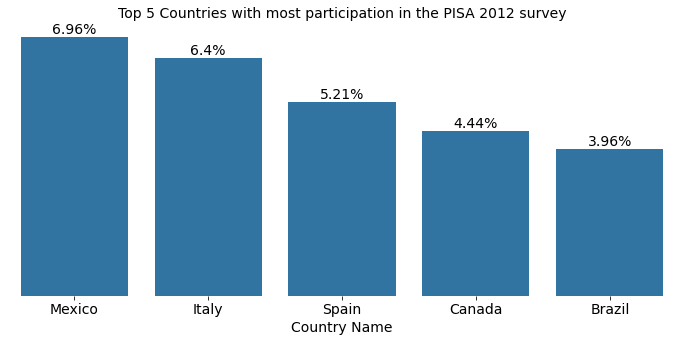

In [4]:
# Top 5 countries summary
summary_p=df.Country.value_counts(normalize=True)*100
summary_p=summary_p.head(5)

# Method that plots a bar chart given a summary of the data
def sumbar(summary_p,title,xlabel,ylabel):
    plt.figure(figsize=[12,5])
    ind=summary_p.index
    vl=summary_p.values
    sb.barplot(x=ind,y=vl,color=sb.color_palette()[0])
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.box(False)
    plt.yticks([])
    
    #adding percentages on bars ans styling
    for i in range(len(summary_p)): plt.text(i, summary_p[i],
                                             str(summary_p[i].round(2))+'%',
                                             fontsize=14,
                                             ha='center',
                                             va='bottom')

# plotting bar given title and appropriate axis values
title='Top 5 Countries with most participation in the PISA 2012 survey'
sumbar(summary_p,title,'Country Name','')

## Math reasoning effort by students across 68 countries 

Effort and interest is vital for success in every field or subject. It appears that enthusiasm or lack of enthusiams cuts across both sexes(males and females) when it comes to math reasoning effort. This can be cleraly seen in the PISA survey as there is relatively a small difference between sexes at each category ranging from frequently to Never.

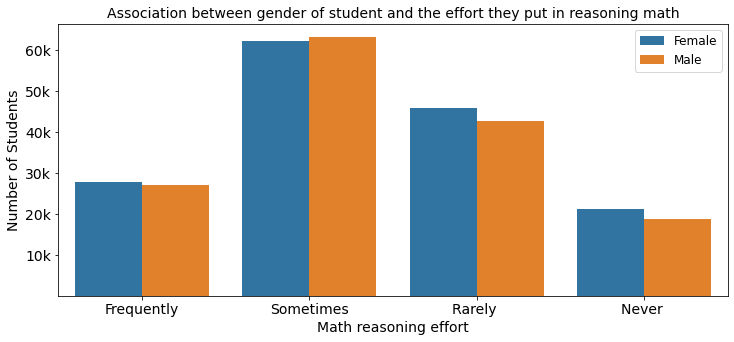

In [5]:
# method to determine association between two categorical variables
def clusbar(x,hue,title,order):
    plt.figure(figsize=[12,5])
    sb.countplot(data = df, x = x, hue = hue,order=order)
    plt.title(title,fontsize=14)
    plt.xlabel('Math reasoning effort',fontsize=14)
    plt.ylabel('Number of Students',fontsize=14)
    plt.xticks(fontsize=14)
    
    # setting customised tick labels
    yticks=np.arange(10000,70000,10000)
    ticklabesl=['10k','20k','30k','40k','50k','60k']
    plt.yticks(yticks,ticklabesl,fontsize=14)
    plt.legend(fontsize='12')

# drawing clustered bar chart demosntrating association between mathe reasoning effort and gender
order=['Frequently','Sometimes','Rarely ','Never ']
title='Association between gender of student and the effort they put in reasoning math'
clusbar('Math reasoning(maths stength)','Gender',title,order)

## Effect of class  repetition on the reading strength of boys and girls.

It is common knowledge that the more a student is consistent with school and classes, the more likely they are to perform well academically, this is clearly seen in the PISA survey as reading strength reduces across both sexes with increased school repetitions with a slight decrease in reading strength among males.

<Figure size 864x360 with 0 Axes>

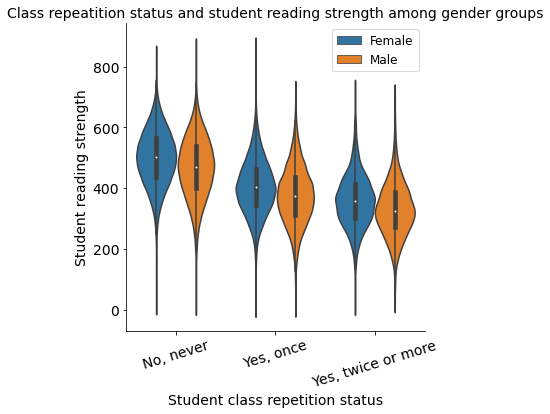

In [6]:
# violin plot to showcase class repeatition with reading strength among males and females

plt.figure(figsize=[12,5])
# plotting figure
sb.catplot(data=df, y="Reading strength", x="Repeat class", hue="Gender", kind="violin",legend=False)

# setting chart parameters
plt.title('Class repeatition status and student reading strength among gender groups',fontsize=14)
plt.xlabel('Student class repetition status',fontsize=14)
plt.ylabel('Student reading strength',fontsize=14)
plt.xticks(rotation=17,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12);
